<a href="https://colab.research.google.com/github/hasune613/hello-world/blob/main/fastai_Excel%E5%BD%A2%E5%BC%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
! pip install --upgrade fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth


auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)



Download 100%.


In [ ]:
from fastbook import *
from kaggle import api
from pandas.api.types import is_string_dtype,is_numeric_dtype,is_categorical_dtype
from fastai.tabular.all import *
from sklearn.tree import  DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg,SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [ ]:
# creds = ''

In [ ]:
# cred_path = Path('/content/drive/MyDrive/Ko Ohashi/エクセル形式/kaggle.json').expanduser()
# if not cred_path.exists():
#     cred_path.parent.mkdir(exist_ok=True)
#     cred_path.write_text(creds)
#     cred_path.chmod(0o600)

In [ ]:
# path = URLs.path('bluebook')
# path

In [ ]:
# Path.BASE_PATH = path

In [ ]:
# if not path.exists():
#     path.mkdir(parents = true)
#     api.competition_download_cli('bluebook-for-bulldozers',path=path)
#     file_extract(path/'bluebook-for-bulldozers.zip')

# path.ls(file_type='text')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ko Ohashi/エクセル形式/TrainAndValid.csv',low_memory=False)
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [ ]:
df.info()

In [ ]:
len(list(df.columns))

53

In [ ]:
df['ProductSize'].unique()#object

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [ ]:
sizes = 'Large','Large / Medium', 'Medium', 'Small','Mini', 'Compact'
type(sizes)

tuple

In [ ]:
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes,ordered = True, inplace=True)

In [ ]:
type(df['ProductSize'] .unique())#Categorical

pandas.core.arrays.categorical.Categorical

In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,...,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,...,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,...,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,...,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,...,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np

In [ ]:
#お題は？
dep_var = 'SalePrice'
df[dep_var]=np.log(df[dep_var])
#log変換の理由 => evaluation(評価)は「salepriceのlogをとる」

In [ ]:
np.log(1000)

6.907755278982137

In [ ]:
np.exp(6.907755278982137)

999.9999999999998

In [ ]:
df = add_datepart(df,'saledate') #データの水増し [2021/8/23] -> [2021], [8], [23], [月末ではない], [年末でもない]等

In [ ]:
' '.join(o for o in df.columns if o.startswith('sale'))#水増しデータ詳細

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [ ]:
len([o for o in df.columns if o.startswith('sale')])#水増しデータ個数

13

In [ ]:
len(df.columns)

65

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Ko Ohashi/エクセル形式/Test.csv',low_memory=False)
df_test = add_datepart(df_test,'saledate')

In [ ]:
# df_test -> dep_var('SalePrice')を持っていない 65-1=64
len(df_test.columns)

64

In [ ]:
#fast ai便利関数
#Categorify -> カテゴリ形式のデータにインデックス（通し番号）をふる
#FillMissing -> null（空）埋め

procs = [Categorify, FillMissing]

In [ ]:
#データセットの分割

cond = (df.saleYear < 2011) | (df.saleMonth < 10)#2011より前かつ10月より前
train_idx = np.where(cond)[0]#上の条件を満たしている=古い(学習用)
valid_idx = np.where(~cond)[0]#満たしていなない=新しい(評価用)

splits = (list(train_idx), list(valid_idx))

In [ ]:
train_idx

array([     0,      1,      2, ..., 412695, 412696, 412697])

In [ ]:
cont, cat = cont_cat_split(df, 1, dep_var = dep_var)

In [ ]:
len(df.columns)

65

In [ ]:
# cont_cat_split??

In [ ]:
to = TabularPandas(df, procs, cat, cont, y_names = dep_var, splits=splits)


In [ ]:
to[:5]

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,...,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,...,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,...,1,1.077754e+09,1,1
3,1139251,10.558414,1026470,332,...,1,1.305763e+09,1,1
4,1139253,9.305651,1057373,17311,...,1,1.248307e+09,1,1


In [ ]:
len(to.train), len(to.valid)

(404710, 7988)

In [ ]:
# to.train[:5]

In [ ]:
# to.valid[-5:]

In [ ]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [ ]:
to1 = TabularPandas(df, procs,[ 'state', 'ProductGroup', 'Drive_System', 'Enclosure'], [],y_names=dep_var,splits = splits)
to1.show(3)

,state,ProductGroup,Drive_System,Enclosure,SalePrice
0,Alabama,WL,#na#,EROPS w AC,11.097410
1,North Carolina,WL,#na#,EROPS w AC,10.950807
2,New York,SSL,#na#,OROPS,9.210340


In [ ]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,...,False,False,False,1.163635e+09
1,1139248,10.950807,117657,77,...,False,False,False,1.080259e+09
2,1139249,9.210340,434808,7009,...,False,False,False,1.077754e+09


In [ ]:
to1.items[[ 'state', 'ProductGroup', 'Drive_System', 'Enclosure']].head(3)


,state,ProductGroup,Drive_System,Enclosure
0,1,6,0,3
1,33,6,0,3
2,32,3,0,6


In [ ]:
df.info()

In [ ]:
#カラム削減
xs_final_time_columns_list =['YearMade',
'Coupler_System','ProductSize','fiProductClassDesc','ModelID','saleElapsed','fiProductClassDesc','Enclosure',
'fiModelDesc','Hydraulics_Flow','ProductGroup','Hydraulics','fiModelDescriptor','Tire_Size','Drive_System']

In [ ]:
xs_final_time_columns_list

['YearMade',
 'Coupler_System',
 'ProductSize',
 'fiProductClassDesc',
 'ModelID',
 'saleElapsed',
 'fiProductClassDesc',
 'Enclosure',
 'fiModelDesc',
 'Hydraulics_Flow',
 'ProductGroup',
 'Hydraulics',
 'fiModelDescriptor',
 'Tire_Size',
 'Drive_System']

In [ ]:
len(list(xs_final_time_columns_list))

15

In [ ]:
len(df.columns)

65

In [ ]:
df_nn = pd.read_csv('/content/drive/MyDrive/Ko Ohashi/エクセル形式/TrainAndValid.csv',low_memory=False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes, ordered=True,inplace=True)
df_nn[dep_var] = np.log(df_nn[dep_var])
df_nn = add_datepart(df_nn, 'saledate')

In [ ]:
df_nn_final = df_nn[list(xs_final_time_columns_list) + [dep_var]].copy

In [ ]:
df_nn_final = df_nn

In [ ]:
cont_nn, cat_nn = cont_cat_split(df_nn_final, max_card = 9000, dep_var=dep_var)

In [ ]:
cont_nn

['SalesID',
 'MachineID',
 'auctioneerID',
 'MachineHoursCurrentMeter',
 'saleElapsed']

In [ ]:
cat_nn

In [ ]:
df_nn_final[cat_nn].nunique()

ModelID                 5281
datasource                 6
YearMade                  73
UsageBand                  3
fiModelDesc             5059
                        ... 
saleIs_month_start         2
saleIs_quarter_end         2
saleIs_quarter_start       2
saleIs_year_end            2
saleIs_year_start          2
Length: 59, dtype: int64

In [ ]:
df_nn_final[cont_nn].nunique()

SalesID                     412698
MachineID                   348808
auctioneerID                    30
MachineHoursCurrentMeter     15633
saleElapsed                   4013
dtype: int64

In [ ]:
cat_nn.remove('fiModelDescriptor')

In [ ]:
df_nn_final.saleElapsed = df_nn_final.saleElapsed.astype(float)#もともとカテゴリカルだった型(整数)->実数(浮動小数)

In [ ]:
# procs = [Categorify, FillMissing]
# to = TabularPandas(df, procs, cat, cont, y_names = dep_var, splits=splits)

procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)

In [ ]:
len(to_nn)

412698

In [ ]:
dls = to_nn.dataloaders(1024)#batch size = 1024

In [ ]:
y = to_nn.train.y
y.min(), y.max()

(8.465899467468262, 11.863582611083984)

In [ ]:
from fastai.tabular.all import *

In [ ]:
learn = tabular_learner(dls, y_range=(8,12), layers=[500, 250],
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.0002754228771664202)

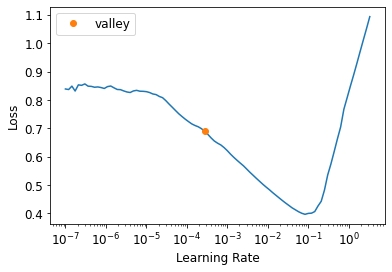

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5,1e-2)

epoch,train_loss,valid_loss,time
0,0.057458,0.060490,01:31
1,0.047847,0.055708,01:27
2,0.041750,0.050524,01:24
3,0.035860,0.048292,01:24
4,0.031562,0.049645,01:26


In [ ]:
import math

In [ ]:
def r_mse(pred, y):
    return round(math.sqrt(((pred-y)**2).mean()),4)

In [ ]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

0.2228